# Evolutionary model
## Wright Fisher model: selection, mutation, and drift
## Basic model fitting (distance based)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wf import WF

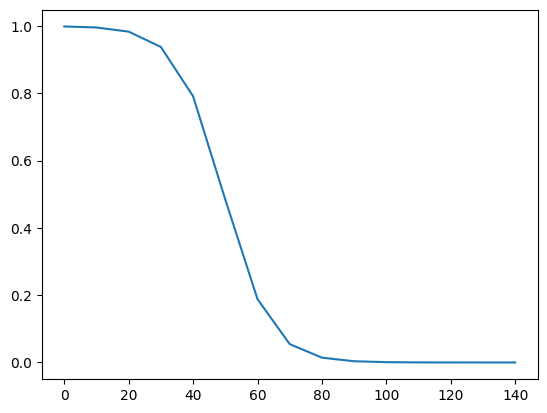

In [10]:
N=int(1.9e6)
generation=np.array([10*i for i in range(15)])
s_cnv=0.15
m_cnv=1e-5
p_0=1-0.999
seed=42
sim = WF(s_cnv=np.log10(s_cnv), m_cnv=np.log10(m_cnv), p0=np.log10(p_0), N=N, generation=generation, seed=42, noisy=False)
plt.plot(generation, sim)

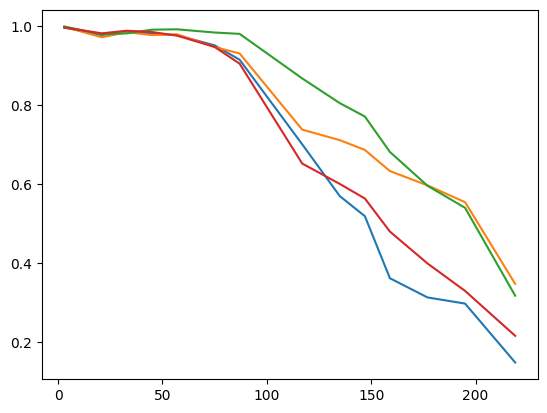

In [12]:
df = pd.read_csv('empirical_data/clean_data_exp_2.csv', index_col=0)
x_0 = df[df['Strain']=='DGY1886_1'].iloc[:,[1,-2]]
x_1 = df[df['Strain']=='DGY1886_2'].iloc[:,[1,-2]]
x_2 = df[df['Strain']=='DGY1886_3'].iloc[:,[1,-2]]
x_3 = df[df['Strain']=='DGY1886_4'].iloc[:,[1,-2]]

for x in [x_0,x_1,x_2,x_3]:
    plt.plot(x['Generation'], x['Multicopy_mCitrine '])

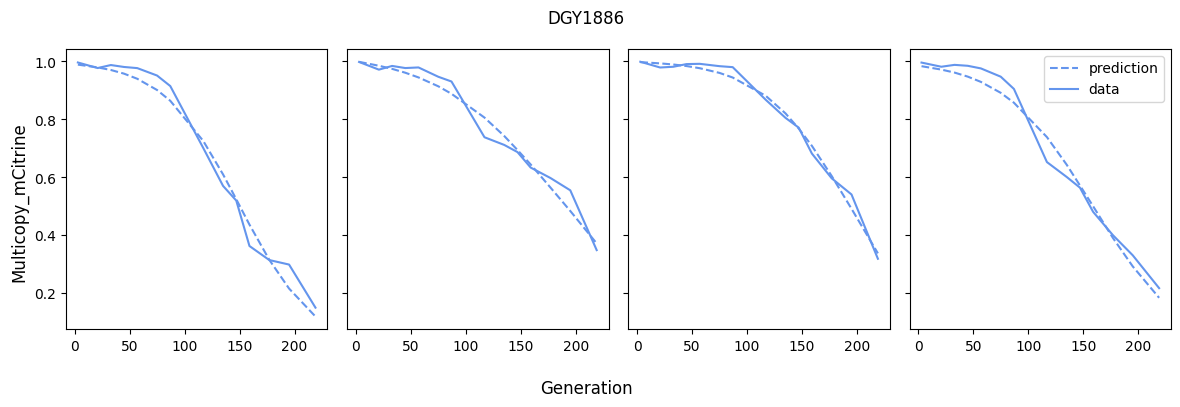

In [25]:
from scipy.optimize import minimize
from functools import partial

def loss(x,p):
    s_cnv, m_cnv, p_0 = np.log10(p)
    return ((x['Multicopy_mCitrine ']-WF(N=int(2e6), generation=x['Generation'], s_cnv=s_cnv, m_cnv=m_cnv, p0=p_0, seed=42))**2).sum()
    
def fit(x,p):
    func = partial(loss, x)
    res = minimize(func, x0 = p, bounds = [[1e-3,0.4],[1e-8,1e-2],[0.0001,0.1]], method='Nelder-Mead', tol=1e-6)
    return res.x, res.fun

s_cnv=0.05
m_cnv=1e-4
p_0=0.01
p = [s_cnv, m_cnv, p_0]

fig, ax = plt.subplots(1,4,figsize=(12,4), tight_layout=True, sharex=True, sharey=True)
x = [x_0,x_1,x_2,x_3]
for i in range(len(x)):
    x_i = x[i]
    p_hat, rmse = fit(x_i,p)
    s_cnv, m_cnv, p_0 = np.log10(p_hat)
    ax[i].plot(x_i['Generation'], WF(N=int(2e6), generation=x_0['Generation'], s_cnv=s_cnv, m_cnv=m_cnv, p0=p_0, seed=42), color='cornflowerblue', label='prediction', ls='--')
    ax[i].plot(x_i['Generation'], x_i['Multicopy_mCitrine '], color='cornflowerblue', label='data')

fig.suptitle('DGY1886')
fig.supxlabel('Generation')
fig.supylabel('Multicopy_mCitrine')
ax[3].legend()

In [ ]:
# Last parameter estimations
print(s_cnv, m_cnv, p_0)

0.0016722441481555497 0.000583636180525625 1.0
